In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('Salary_data.csv')

# Display the first few rows of the dataset
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
# Select the features (columns) for training
features = df.columns

# Convert the features to a NumPy array
X = df[features].values

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination based on the expected percentage of anomalies

# Fit the model to the data
model.fit(X)


IsolationForest(contamination=0.05, random_state=42)

In [9]:
# Predict the anomaly score for each data point
anomaly_scores = model.decision_function(X)

# Convert the anomaly scores to a DataFrame
anomaly_df = pd.DataFrame({'AnomalyScore': anomaly_scores})

# Display the anomaly scores
anomaly_df.head()


,AnomalyScore
0,0.010843
1,0.023340
2,0.016370
3,0.055205
4,0.051576


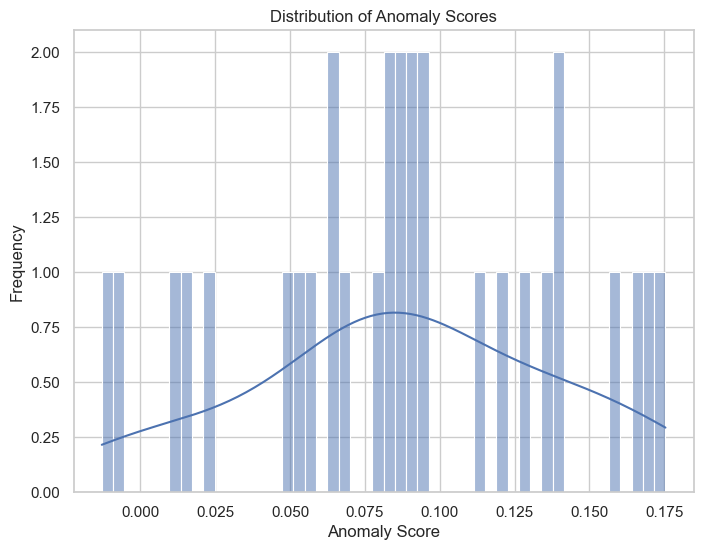

In [10]:
# Plot the distribution of anomaly scores
plt.figure(figsize=(8, 6))
sns.histplot(anomaly_df['AnomalyScore'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Choose a threshold (you can experiment with different values)
threshold = anomaly_df['AnomalyScore'].quantile(0.95)

# Flag anomalies in the original dataset
df['IsAnomaly'] = anomaly_df['AnomalyScore'] > threshold

# Display the flagged anomalies
df[df['IsAnomaly']]


,YearsExperience,Salary,IsAnomaly
9,3.7,57189.0,True
12,4.0,56957.0,True
